<a href="https://colab.research.google.com/github/TranGiaKhanh-23BI14218/Projects/blob/main/LetterRecognition_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving letter-recognition.csv to letter-recognition (6).csv
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


<ipython-input-7-a83d0c32db2a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, order=sorted(labels.unique()), palette='tab20')


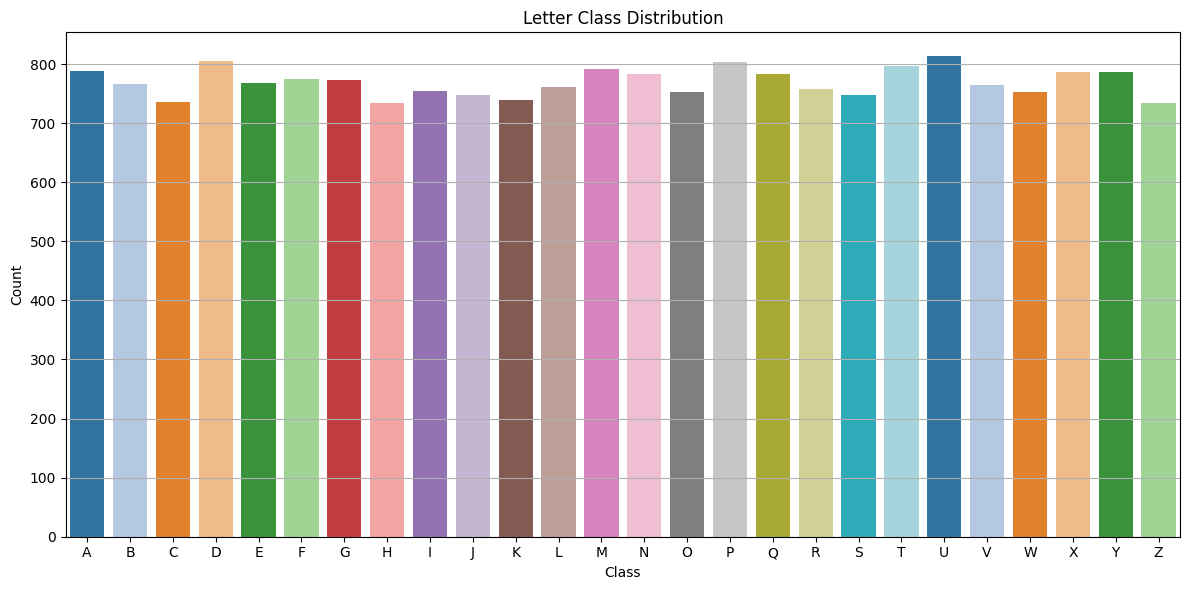


Training set size: 16000 samples
Test set size: 4000 samples
Accuracy: 0.9772
              precision    recall  f1-score   support

           A       0.99      1.00      1.00       158
           B       0.95      0.95      0.95       153
           C       0.98      0.98      0.98       147
           D       0.95      0.97      0.96       161
           E       0.95      0.97      0.96       154
           F       0.98      0.98      0.98       155
           G       0.97      0.97      0.97       155
           H       0.93      0.95      0.94       147
           I       0.97      0.95      0.96       151
           J       0.94      0.97      0.95       149
           K       0.95      0.97      0.96       148
           L       0.99      0.98      0.99       152
           M       1.00      0.99      0.99       158
           N       0.99      0.98      0.98       157
           O       0.99      0.97      0.98       150
           P       0.99      0.98      0.98       161
  

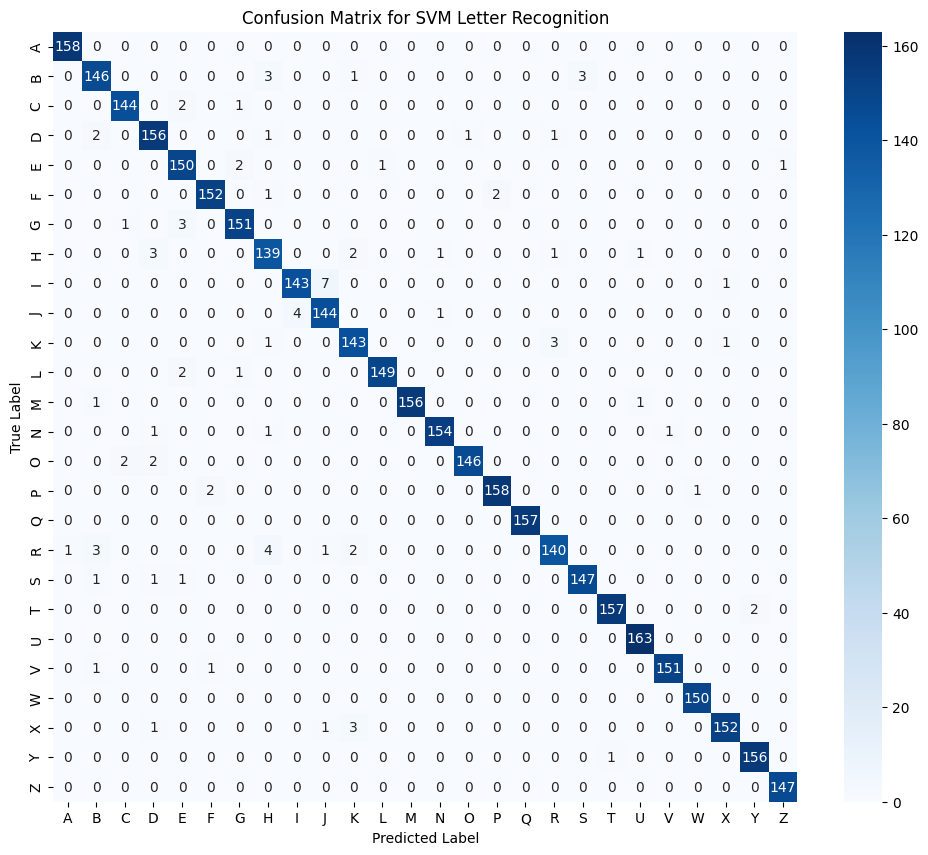

<ipython-input-7-a83d0c32db2a>:97: UserWarning: Mismatched number of handles and labels: len(handles) = 9 len(labels) = 26
  plt.legend(handles=scatter.legend_elements()[0], labels=classes,


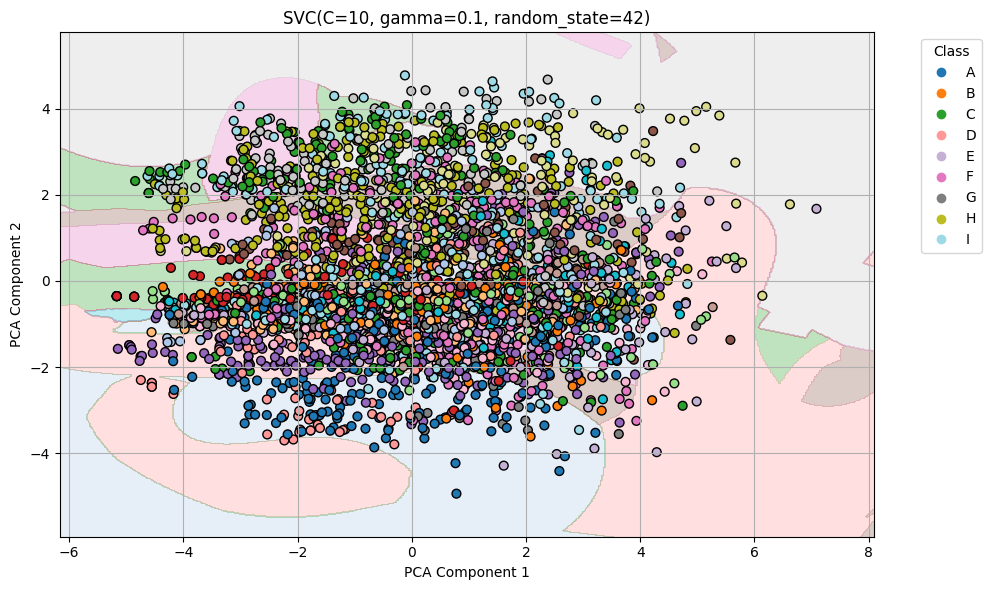

In [ ]:


from google.colab import files
files.upload()


import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder #a
from sklearn.decomposition import PCA
data = pd.read_csv('letter-recognition.csv')
import matplotlib.pyplot as plt


X = data.drop('letter', axis=1)
y = data['letter']

print(data.info())

def plot_class_distribution(labels, title="Class Distribution"):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=labels, order=sorted(labels.unique()), palette='tab20')
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


print(data['letter'].value_counts())
plot_class_distribution(data['letter'], title="Letter Class Distribution")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fitting training data
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=10, gamma= 0.1, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique())) # Ensure labels are sorted alphabetically
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Letter Recognition')
plt.show()


from sklearn.preprocessing import LabelEncoder

def plot_decision_boundary(X, y, title="Decision Boundary (PCA Projection)", classes=None):

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Reduce dimensions
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Train a simple model on reduced data
    clf = SVC(kernel='rbf', C=10, gamma=0.1)
    clf.fit(X_reduced, y_encoded)

    # Create a grid to plot decision boundaries
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict on grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and scatter
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab20')
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_encoded, cmap='tab20', edgecolor='k', s=40)

    if classes is not None:
        plt.legend(handles=scatter.legend_elements()[0], labels=classes,
                   title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_decision_boundary(X_test_scaled, y_test, svm_model, classes=sorted(y.unique()))



In [ ]:
from google.colab import files
files.upload()

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('letter-recognition.csv')
print(data['letter'].value_counts())


X = data.drop('letter', axis=1)
y = data['letter']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C_values = [0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]

# Perform cross-validation over parameter grid
print("\nCross-validation accuracy for different (C, gamma) pairs:\n")
for C in C_values:
    for gamma in gamma_values:
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)

        scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        mean_accuracy = np.mean(scores)
        print(f"C = {C}, gamma = {gamma} --> Cross-validation accuracy: {mean_accuracy:.4f}")



Saving letter-recognition.csv to letter-recognition.csv
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

Training set size: 16000 samples
Test set size: 4000 samples

Cross-validation accuracy for different (C, gamma) pairs:

C = 0.1, gamma = 0.001 --> Cross-validation accuracy: 0.2659
C = 0.1, gamma = 0.01 --> Cross-validation accuracy: 0.6893
C = 0.1, gamma = 0.1 --> Cross-validation accuracy: 0.8514
C = 0.1, gamma = 1 --> Cross-validation accuracy: 0.5647
C = 1, gamma = 0.001 --> Cross-validation accuracy: 0.6921
C = 1, gamma = 0.01 --> Cross-validation accuracy: 0.8421
C = 1, gamma = 0.1 --> Cross-validation accuracy: 0.9505
C = 1, gamma = 1 --> Cross-validation accuracy: 0.9326
C = 10, gamma = 0.001 --> Cross-validation accuracy: 0.8188
C = 10, gamma = 0.01 --> Cros